# Validation & Apprentissage sur différents modèles

Un peu d'imports

In [1]:
import pandas
import numpy as np
import data.data as data
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
%matplotlib inline
import matplotlib.pyplot as plt

Les données sont chargées depuis un fichier csv _via_ pandas

In [2]:
files = {"train": "./res/train.csv", "test": "./res/test.csv"}
files["train"] = data.open_otto_csv(files["train"])
files["test"] = data.open_otto_csv(files["test"])

Puis on ne récupère que les colonnes qui nous intéressent pour les données et leur label

In [3]:
train_x, train_y = data.get_x_y(files["train"])

## Courbe d'apprentissage

### Gaussian Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB

train_sizes, train_scores, valid_scores = learning_curve(GaussianNB(), train_x, train_y, train_sizes=[0.5, 0.7, 0.9], cv=5)

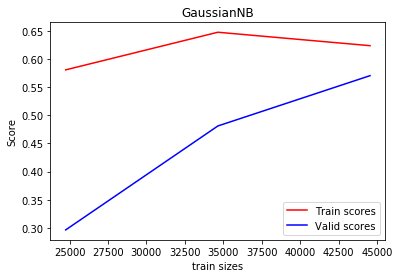

In [5]:
plt.plot(train_sizes, train_scores.mean(axis=1), c='r', label="Train scores")
plt.plot(train_sizes, valid_scores.mean(axis=1), c="b", label="Valid scores")
plt.title("GaussianNB")
plt.xlabel("train sizes")
plt.ylabel("Score")
plt.legend()
plt.show()

## Courbes de validation

### SVC

In [7]:
import sklearn.svm as svm

On cherche à optimiser les nombre maximal d'itérations nécéssaires à notre modèle

In [8]:
train_scores_max_iter, test_scores_max_iter = validation_curve(
    svm.SVC(gamma='auto'), train_x, train_y, param_name="max_iter", param_range=np.arange(100, 1000, 300),
    cv=3, scoring="accuracy", n_jobs=1)

/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-

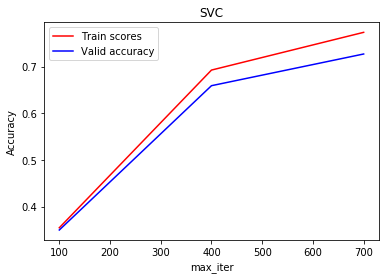

In [15]:
plt.plot(np.arange(100, 1000, 300), train_scores_max_iter.mean(axis=1), c='r', label="Train scores")
plt.plot(np.arange(100, 1000, 300), test_scores_max_iter.mean(axis=1), c="b", label="Valid accuracy")
plt.title("SVC")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Puis de choisir un bon gamma

Le nombre d'itération a été grandement réduit pour réduire le temps de calcul

In [16]:
params = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 'auto']

train_scores_gamma, test_scores_gamma = validation_curve(
    svm.SVC(max_iter=50), train_x, train_y, param_name='gamma', param_range=params,
    cv=3, scoring="accuracy", n_jobs=1)

/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-pack

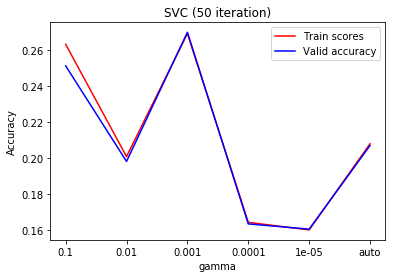

In [17]:
plt.plot(params, train_scores_gamma.mean(axis=1), c='r', label="Train scores")
plt.plot(params, test_scores_gamma.mean(axis=1), c="b", label="Valid accuracy")
plt.title("SVC (50 iteration)")
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Multi Layer Perceptron

production de la courbe de validation sur la taille et le nombre de couches cachées

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
hidden_sizes=[(80,), (30,), (80, 40), (30, 15)]
train_scores_hidden_size, test_scores_hidden_size = validation_curve(
    MLPClassifier(solver='sgd', learning_rate='adaptive'), train_x, train_y,
        param_name='hidden_layer_sizes', param_range=hidden_sizes,
    cv=2, scoring="accuracy", n_jobs=1)

/home/samuel/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/samuel/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

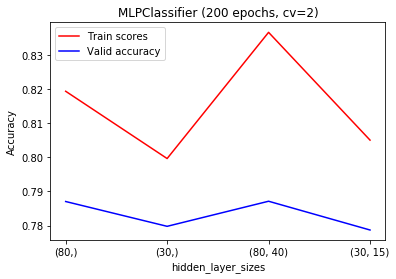

In [20]:
hidden_sizes=["(80,)", "(30,)", "(80, 40)", "(30, 15)"]
plt.plot(hidden_sizes, train_scores_hidden_size.mean(axis=1), c='r', label="Train scores")
plt.plot(hidden_sizes, test_scores_hidden_size.mean(axis=1), c="b", label="Valid accuracy")
plt.title("MLPClassifier (200 epochs, cv=2)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()